# 02807: Project 3
 
## Practical information
 
* This project must be completed in groups of 3 students.
* This project must be handed in as an *.ipynb notebook to the course site on DTU Inside. Go to the Assignments tab to upload your submission. 
* The notebook must be runnable on Google Colab.
* This project is due on Sunday, December 23, 20:00.
* Each group has to hand in *one* notebook with their solutions.
* Your code must be written in Python.
* For each question you should use exactly the cells provided for your solution
* You should not remove the problem statements, and you should not modify the structure of the notebook.
* Your notebook should be runnable, i.e., clicking in the code cells should display the result that you want to have assessed.
 
## Colaboration policy
 
* It is not allowed to collaborate on the exercises with students outside your group, except for discussing the text of the exercise with teachers and fellow students enrolled on the course in the same semester. 
* It is not allowed to exchange, hand-over or in any other way communicate solutions or parts of solutions to the exercises. 
* It is not allowed to use solutions from similar courses, or solutions found elsewhere.

## Contribution table and grading

* The total amount of points in the project is 90.
* You have to indicate who has solved each part of each exercise in a **contribution table**. 
* The following is an example of a contribution table:

|        | Exercise 1 | Exercise 2 | Exercise 3 | Exercise 4 |
|--------|------------|------------|------------|------------|
| **Part 1** | John       |    Mary        |     Ann       |   Mary, Ann         |
| **Part 2** |     Mary       |    Mary        |   Ann         |    John, Ann        |
| **Part 3** |     John, Mary, Ann       |      John, Ann      |   John         | **n.a.**      |
| **Part 4** | **n.a.**       |  Ann          |     John, Mary       | **n.a.**       |
| **Part 5** | **n.a.**     | John, Mary, Ann           | **n.a.**       | **n.a.**       |
| **Part 6** | **n.a.**       | John, Mary, Ann           | **n.a.**      | **n.a.**      |

* A group member can take credit for solving a part of an exercise only if they have contributed **substantially** to the solution. 
* Simple contributions, such as correcting a small bug or double-checking the results of functions, are not sufficient for taking credit for a solution.
* Several group members can take credit for the same solution if they all have contributed substantially to it.
* **Each group member must solve at least 90/3=30 points**. 
* **If no name is provided for an exercise's part, all group members will be assigned responsibility for it**.
* Group members should decide amongst themselves how to collaborate on the project to meet the above-mentioned constraints.  
* Grades are individual. The grade $\text{grade}(m)$ for a group member $m$ ranges from 0 to 10 and is calculated as follows: 

  * $\text{individual-score}(m) = \frac{\text{total number of points for the parts correctly solved by }m}{\text{total number of points for the parts contributed by }m}$

  * $\text{group-score} = \frac{\text{total number of points correctly solved by any group member}}{\text{total number of points in the project}}$

  * $\text{grade}(m) =  7.5 \cdot \text{individual-score}(m) + 2.5 \cdot \text{group-score}$



# Group declaration table 

This table must be filled before submission.



In [ ]:
import pandas as pd

d = {'Exercise 1' : ["", "", "", ""], 
     'Exercise 2' : ["", "", "", ""]
     } 
  
ct = pd.DataFrame(d, index =['Part 1','Part 2','Part 3','Part 4']) 

ct

,Exercise 1,Exercise 2
Part 1,,
Part 2,,
Part 3,,
Part 4,,


# Imports

In [ ]:
import numpy as np
import random

import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

# Exercise 1: Sampling from a stream (51.5 points)


Stream sampling is the process of collecting a representative sample of the elements of a data stream. The sample is usually much smaller than the entire stream, but can be designed to retain important characteristics of the stream, and can be used to estimate many important aggregates on the stream. Generating good samples is crucial to many streaming applications.

In this exercise, you will sample simulated streams to solve a problem that goes like this: Given a stream of elements, we want to sample $k$ elements from it. The total number of elements in the stream is not known in advance. At any point, someone could stop the stream, and we have to return $k$ random elements. You will implement a number of methods to solve this problem, under different assumptions and requirements concerning the data streams.




## Part 1: Sampling $k$ elements (5 pts)

Implement the version of reservoir sampling called "Simple algorithm" on the following Wikipedia entry: [Reservoir sampling](https://en.wikipedia.org/wiki/Reservoir_sampling#:~:text=Reservoir%20sampling%20is%20a%20family,to%20fit%20into%20main%20memory).

Your implementation should fit into the following class. You only need to write the body of the ``update`` method.

In [ ]:
import random
class ReservoirSampler:
  def __init__(self, k):
    # k is the reservoir size
    # sample is the reservoir sample
    # n is the number of stream elements seen so far
    self.k = k
    self.sample = np.array([np.nan]*k)
    self.n = 0
  def update(self, element):
    # takes the last stream element and updates the sample reservoir
    # your code goes here
    # A new element in the stream 
    self.n+= 1 
    # Fils the reservior array 
    if self.n <= self.k:
      self.sample[self.n-1] = element
    
    # replace elements with decreacing probability 
    if self.n > self.k:
      # random interger between 0 and n samples 
      q = np.random.randint(0,self.n)
      # if the random number is below k then the element is saved to the reservoir
      if q <= self.k-1:
        self.sample[q] = element 

Make sure that ``update`` method works correctly. To do so, run the following code cell and check that it updates the reservoir appropriately as stream elements are revealed over time. 

In [ ]:
stream = np.arange(20) # a simulated stream
r = ReservoirSampler(2) # initialize a reservoir sampler with a reservoir of size 2
for e in stream: # receive stream elements one at a time
    r.update(e)  # update the reservoir
print("Sampled elements:", r.sample)

Sampled elements: [ 3. 19.]


Next, check the reservoir sampler experimentally. Do the following:

1.  100.000 times, draw a sample of size 4, from the stream above (``np.range(20)``) and store the result. 
2. Plot the number of times that each number in the input stream has been sampled, using a bar chart like the one shown below. 
If your implementation is correct, you should expect to draw each element with roughly the same frequency. 

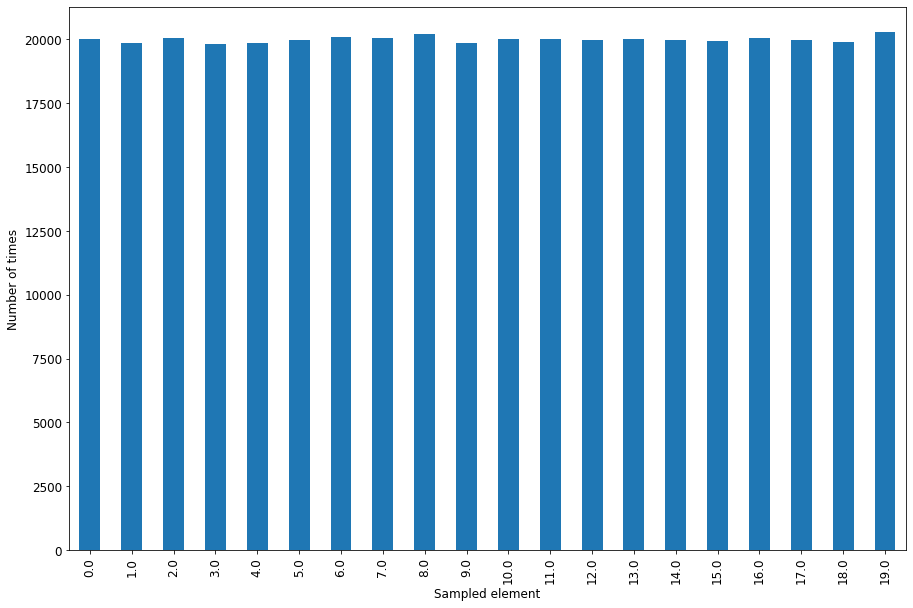


In [ ]:
from collections import Counter
result = []
# Draw samples 100.00 times for a sample size of 4 
for x in range(100000):
    stream = np.arange(20)
    r = ReservoirSampler(4) # initialize a reservoir sampler with a reservoir of size 4
    for e in stream: # receive stream elements one at a time
      r.update(e)  # update the reservoir
    result.append(r.sample.tolist()) # save the samples

# Count the different unique samples
res = Counter(sorted(np.concatenate(result))).values()

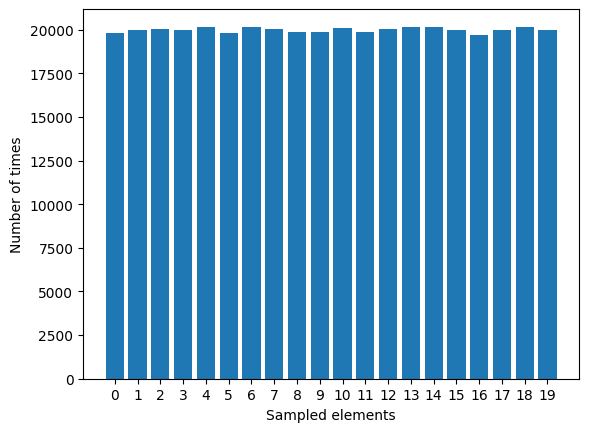

In [ ]:
y_pos = np.arange(20)
plt.bar(y_pos, res, align='center')
plt.xticks(y_pos, y_pos)
plt.ylabel('Number of times')
plt.xlabel('Sampled elements')

plt.show()

## Part 2: Merging reservoir samples: $2$ samples (20 pts)

We will sample from two streams, ``stream_1`` and ``stream_2``, using reservoir sampling, to generate two reservoirs, each of size $k=4$. The input streams are disjoint, i.e., there is no element occurring both in ``stream_1`` and ``stream_2``. 

In [ ]:
stream_1 = np.arange(10)
stream_2 = np.arange(10,30)
sampler_1 = ReservoirSampler(4) # k=4
sampler_2 = ReservoirSampler(4) # k=4

for e in stream_1:
  sampler_1.update(e)
for e in stream_2:
  sampler_2.update(e)  

When both samplers finish their stream traversal, two reservoirs, ``sampler_1.sample`` and ``sampler_2.sample`` have been generated. In addition, both sampler objects have counted the number of items in their own stream during the traversal, and thus the sizes of the input streams are known when the above code cell has been executed. In particular, they are stored in the sampler objects as ``sampler_1.n`` and ``sampler_2.n``. 

We want to combine the two reservoirs we have, ``sampler_1.sample`` and ``sampler_2.sample``, to generate a sample of size $k$ of elements coming from ``stream_1`` and ``stream_2``, where every element in ``stream_1`` and ``stream_2`` is sampled with equal probability, i.e. with probability $\frac{k}{n_1 + n_2}$, where $n_1$ and $n_2$ are the sizes of ``stream_1`` and ``stream_2`` respectively. 

Implement a function called ``merge_samples(sampler_1, sampler_2)`` that generates and returns this sample. The function should not traverse the streams; it should only use the attributes of the sampler objects ``sampler_1`` and ``sampler_2`` to generate the final sample.


**Hint**: ``merge_samples`` should draw an element from ``sampler_1.sample`` with a different probabibility than from ``sampler_2.sample``, to correct for the fact that the two samples were obtained from streams of different sizes.

In [ ]:
def merge_samples(sampler_1, sampler_2):
  # your code goes here
  # calculate the size of k
  k = len(sampler_1.sample)
  # defining the sample size 
  sampler_merge = np.array([np.nan]*k)
  # The probability that the sample is from sampler_1
  P = sampler_1.n/(sampler_2.n+sampler_1.n)
  # For each element in the resevoir the value is found based on the probability for sample. 
  for i in range(k):
    # Random values between 0 and 1 
    j = random()
    if j <= P:
      # move a random value from sampler 1 to the merged samples
      sampler_merge[i] = sampler_1.sample[np.random.randint(0,k)]
    else: 
      # move a random value from sampler 2 to the merged samples
      sampler_merge[i] = sampler_2.sample[np.random.randint(0,k)]
  return sampler_merge


Next, check ``merge_samples`` experimentally. Do the following:

1. 50.000 times, create two reservoir samplers ``sampler_1=ReservoirSampler(4)`` and ``sampler_2 = ReservoirSampler(4)`` and update ``sampler_1`` traversing ``stream_1``, and ``sampler_2`` traversing ``stream_2``. Merge the two obtained samples with ``merge_samples`` and store the result.
2. Plot the number of times each number in the two input streams has been sampled by the above procedure, using a bar chart like the one shown below. If your implementation is correct, you should expect to draw each element with roughly the same frequency.


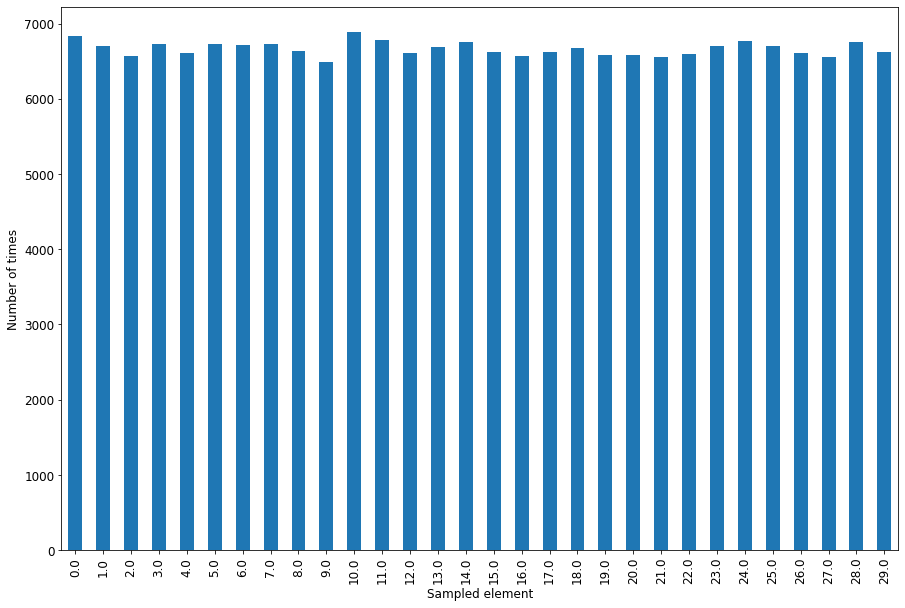


In [ ]:
from collections import Counter
from random import random
result = []
# Draw samples 500.000 times for a sample size of 4 
for x in range(50000): 
  stream_1 = np.arange(10)
  stream_2 = np.arange(10,30)
  sampler_1 = ReservoirSampler(4) # k=4
  sampler_2 = ReservoirSampler(4) # k=4

  for e in stream_1:
    sampler_1.update(e)
  for e in stream_2:
    sampler_2.update(e)
  sampler_merge = merge_samples(sampler_1, sampler_2)

  result.append(sampler_merge)

res = Counter(np.concatenate(result).ravel().tolist()).values()

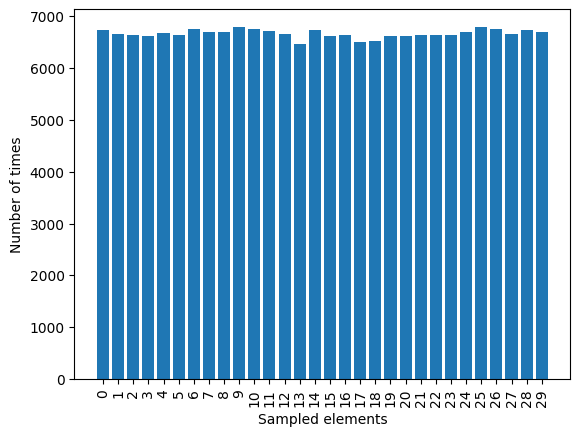

In [ ]:
y_pos = np.arange(30)
plt.bar(y_pos, res, align='center')
plt.xticks(y_pos, y_pos,rotation='vertical')
plt.ylabel('Number of times')
plt.xlabel('Sampled elements')

plt.show()

Explain in words how your implementation of ``merge_samples`` works, and how it ensures that each element in the original two streams has the same probability of being in the output of ``merge_samples``. 

*YOUR TEXT GOES HERE*

First the sample size $k$ is determined and the new stream ``sampler_merge`` is initialized. The probability of a sample belonging to sampler 1 is then calculated. For each element in ``sampler_merge`` is a random value between 0 and 1 computed and a random element of sampler 1 is included in ``sampler_merge``, if the random value is smaller than the probability of belonging to sampler 1. 

By taking the probabilty of a sample belonging to sampler 1 into account, the probabilty of a sample belonging to sampler 2 is indirectly taken into account. This probability depend on the size of each sampler, why it is ensured that each element in the original streams have equal probability of being in the new stream.


## Part 3: Merging reservoir samples: $m$ samplers (11.5 pts)




In this part, you have to generalize your solution to Part 2 to develop a method that can combine $m$ reservoir samples, where $m\geq 2$. 

The input streams are disjoint, i.e., there is no element occurring both in ``stream_i`` and ``stream_j``, for any $i,j=1,\dots,m$ such that $i\neq j$. 

Implement a function ``merge_sample_list(sampler_list)`` that takes as input $m$ ``ReservoirSampler`` objects, ``sampler_1``,...,``sampler_m``, each having traversed streams ``stream_1``,...,``stream_m`` respectively, and each having as a result stored a sample of size $k$. 

The function has to use the $m$ reservoir samples to generate a final sample, of size $k$, of elements coming from ``stream_1``,...,``stream_m``, where every element is sampled with equal probability, i.e. with probability $\frac{k}{n_1 + ... + n_m}$, where $n_i$ is the sizes of ``stream_i``, for $i=1,...,m$. 

The function should not traverse the streams; it should only use the attributes of the sampler objects ``sampler_1``,..., ``sampler_m`` to generate the final sample.


**Hint**: you could define ``merge_sample_list`` so that it calls ``merge_sample`` repeatedly. But you are free to define ``merge_sample_list`` in any way you like.

In [ ]:
def merge_sample_list(sampler_list):
  # your code goes here
  # calculate the size of k
  k = len(sampler_list[0].sample)
  # defining the sample size 
  sampler_merge = np.array([np.nan]*k)
  # total size of all streams
  N = sum(sample.n for sample in sampler_list)
  # k random numbers between 0 and 1
  r = np.random.rand(k).tolist()

  # initial lower bound of probability interval
  P_low = 0
  for i in range(len(sampler_list)):
    # the upper bound probability that the sample is from the given sample
    P_high = P_low + sampler_list[i].n/N
    for j in range(k):
      if P_low < r[j] and r[j] <= P_high:
        # move a random value from sampler to the merged samples
        sampler_merge[j] = sampler_list[i].sample[np.random.randint(0,k)]
    # update lower bound for next iteration
    P_low = P_high
  return sampler_merge


Explain in words how your implementation of ``merge_sample_list`` works, and how it ensures that each element in the input streams has the same probability of being in the output of ``merge_sample_list``. 

*YOUR TEXT GOES HERE*

This implementation resembles ``merge_sample`` as the sample size $k$ is first determined, whereupon the new stream ``sampler_merge`` is initialized. Moreover, the total size of all streams, $N$, is determined and $k$ random values between 0 and 1 are initialized to determine which sampler a given element must origin from. By looping through ``sampler_list`` is the probabilty interval for each sampler determined by a lower and upper bound. A random element of the given sampler is assigned to ``sampler_merge`` if one of the random values between 0 and 1 belongs to the given probability interval. For each sampler is the probability interval updated such that it is on top of that of the previous sampler. Thereby it is ensured that the total probability of all samplers is 1.

Next, check  ``merge_sample_list`` experimentally. Do the following:

1. 50.000 times, create three reservoir samplers, ``sampler_1=ReservoirSampler(4)``, ``sampler_2 = ReservoirSampler(4)`` and ``sampler_3 = ReservoirSampler(4)``, update ``sampler_1`` traversing ``stream_1 = np.arange(10)``, ``sampler_2`` traversing ``stream_2 = np.arange(10,30)`` and ``sampler_3`` traversing
``stream_3 = np.arange(30,40)``. Merge the three obtained samples with ``merge_sample_list`` and store the result.
2. Plot the number of times each number in the two input streams has been sampled by the above procedure, using a bar chart like the one shown below. If your implementation is correct, you should expect to draw each element with roughly the same frequency.

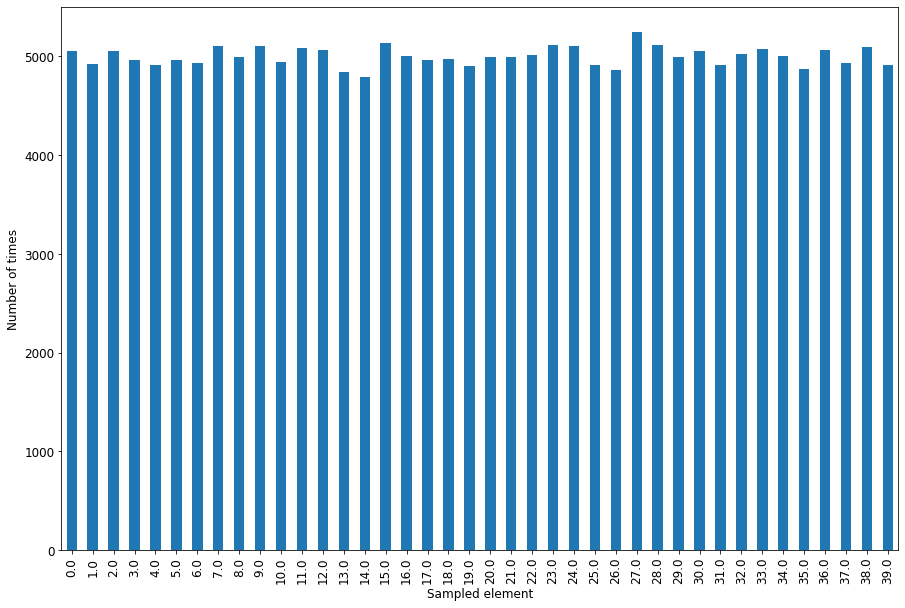


In [ ]:
# your code goes here
result = []
# Draw samples 500.000 times for a sample size of 4 
for x in range(50000): 
  stream_1 = np.arange(10)
  stream_2 = np.arange(10,30)
  stream_3 = np.arange(30,40)
  sampler_1 = ReservoirSampler(4) # k=4
  sampler_2 = ReservoirSampler(4) # k=4
  sampler_3 = ReservoirSampler(4) # k=4

  for e in stream_1:
    sampler_1.update(e)
  for e in stream_2:
    sampler_2.update(e)
  for e in stream_3:
    sampler_2.update(e)
  sampler_merge = merge_sample_list(list([sampler_1, sampler_2, sampler_3]))

  result.append(sampler_merge)

res = Counter(np.concatenate(result).ravel().tolist()).values()

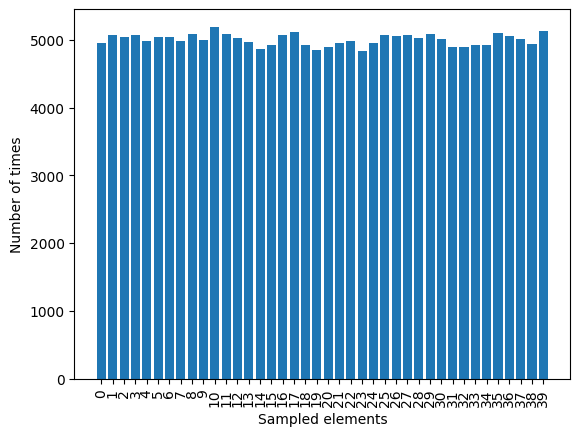

In [ ]:
y_pos = np.arange(40)
plt.bar(y_pos, res, align='center')
plt.xticks(y_pos, y_pos,rotation='vertical')
plt.ylabel('Number of times')
plt.xlabel('Sampled elements')

plt.show()

## Part 4: Reservoir sampling from a stream with subgroups (15 pts)

Suppose you want to conduct a study to find the answer to the question "Are men or women better drivers?" in the general public. Due to limited time and resources you can only survey students on the campus of DTU. You draw a sample using simple random sampling and conclude that approximately 65% of the population thinks that men are better drivers.

What went wrong? The ratio between men and women at DTU does not reflect the general population (see eg. [this editorial](https://www.dtu.dk/english/About/ORGANIZATION/OFFICE-of-the-PRESIDENT/Editorials/June-2018)).

In this exercise you should use reservoir sampling to generate a sample of answers in which 50% of the answers come from men, and 50% come from women. You may extend the implementation of reservoir sampling from Part 1.

Use the following code to generate test data. It generates a stream of survey answers where about 65% of the answers are from males and most of the participants say that their own gender is the better driver.

In [ ]:
answer_stream = []
for i in range(50000):
  gender = 1 if random() < 0.65 else 0
  answer = gender if random() < 0.98 else abs(gender-1)
  answer_stream.append((gender,answer))

Write a function ``sample_answers`` which processes ``answer_stream`` one element at a time, and returns a sample of answers coming 50% from women and 50% from men. The function should make use of reservoir sampling. The sample size should be 100. Every male student's answer in the stream should have the same probability of ending up in the sample. Every female student's answer in the stream should also have the same probability of ending up the sample.  

In [ ]:
# your code goes here
def sample_answers(answer_stream):
  # sample size k
  k = 100
  sample = np.array([np.nan]*k)
  n_male, n_female = 0, 0

  for element in answer_stream:
    if element[0] == 1:
      # A new element in the stream 
      n_male += 1 
      # Fils the reservior array 
      if n_male <= k/2:
        sample[n_male-1] = element[1]
      # replace elements with decreacing probability 
      if n_male > k/2:
        # random interger between 0 and n samples 
        q = np.random.randint(0,n_male)
        # if the random number is below k then the element is saved to the reservoir
        if q <= k/2-1:
          sample[q] = element[1]

    else:
      # A new element in the stream 
      n_female += 1 
      # Fils the reservior array 
      if n_female <= k/2:
        sample[int(k/2+n_female-1)] = element[1]
      # replace elements with decreacing probability 
      if n_female > k/2:
        # random interger between 0 and n samples 
        q = np.random.randint(0,n_female)
        # if the random number is below k then the element is saved to the reservoir
        if q <= k/2-1:
          sample[int(k/2+q)] = element[1]
  return sample


Explain in words how your implementation of ``sample_answers`` works and how it ensures the requirements stated above. 

*YOUR TEXT GOES HERE*

In our implementation of ``sampler_answers`` is the sample size $k$ first defined, whereupon the output ``sample`` is initialized. One element of ``answer_stream`` is then processed at a time by looping through all elements. An if-statement is used to distinguish between answers given by male and female participants. The two genders are subsequently treated seperately but similar and according to reservoir streaming. First, the number of elements processed of the given gender is incremented. If the proportion of the reservoir allocated for the given gender (i.e. 50\%) is not full, the answer of the given element is included in the reservoir. However, if it is full, elements with decreasing probability are replaced as in part 1. This means that a random integer between 0 and the number of elements processed so far of the given gender is computed. If the random integer is smaller than $k/2$ (since each gender occupies 50\% of the reservoir), the answer of the given element replaces the current answer in the index of the random integer in the resevoir. 

Process the ``answer_stream`` stream with ``sample answers`` and show the value counts for each answer. The sample should have roughly 50 answers indicating that men are better drivers, and 50 indicating that women are. Compute and show the value counts for each answer.

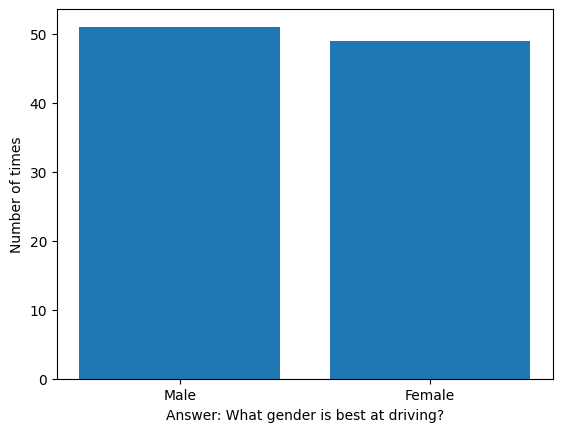

In [ ]:
# your code goes here
res = Counter(sample_answers(answer_stream).tolist()).values()
y_pos = np.arange(2)
plt.bar(y_pos, res, align='center')
plt.xticks(y_pos, ('Male', 'Female'))
plt.ylabel('Number of times')
plt.xlabel('Answer: What gender is best at driving?')

plt.show()

# Exercise 2: Majority elements in a stream (38.5 points)

A very useful statistic for many streaming applications is to keep track of elements that occur frequently. This type of problem come in several flavours.

- *Mode* : Find the element (or elements) with the highest frequency.
- *Majority*: Find the element with strictly more than 50% occurrence in the stream - note that there may not be a majority element in a stream.
- *Threshold:* Find all elements that occur more than $f$ fraction of the stream
for any $0 < f \leq 1$. Finding majority is a special case with $f > 1/2$.

In this exercise, you will implement methods to compute majority elements from simulated streams. The total number of elements in the stream is not known in advance. At any point, someone could stop the stream, and we have to return a majority element, if it exists. You will implement a number of methods to solve this problem, under different assumptions and requirements concerning the data streams.


## Part 1: Finding the majority element (7 pts)

Implement the Boyer-Moore majority vote algorithm as described in the following Wikipedia entry: [Boyer-Moore majority vote algorithm](https://en.wikipedia.org/wiki/Boyer%E2%80%93Moore_majority_vote_algorithm).

Your implementation should fit into the following class. You only need to write the body of the ``update`` method.

In [ ]:
class BM_Majority:
  def __init__(self):
    self.majority_element = None
    self.counter = 0
  def update(self, element):
    # your code goes here
    if (self.counter == 0):
      self.majority_element = element
      self.counter = 1
    elif (self.majority_element == element):
      self.counter += 1
    else: 
      self.counter -= 1
      if (self.counter == 0):
        self.majority_element = element
        self.counter = 1
    return self

Make sure that the ``update`` method works correctly. To do so, run the following code cell and check that it provides the right output after traversing the stream. 

In [ ]:
stream = np.random.randint(low=0,high=10,size=20)
print(stream)
m = BM_Majority()
for e in stream:
    m.update(e)
print("Majority element:", m.majority_element)

[3 4 8 9 1 1 8 8 6 4 5 7 8 0 4 7 1 5 0 7]
Majority element: 7


If the Boyer–Moore majority vote algorithm returns ``majority_element`` $e$, it either holds that $e$ is the majority element or there isn't a majority element.

Modify the implementation of the algorithm so that it always returns the majority element if there is one and ``None`` otherwise. 

**Hint**: A data stream may be traversed multiple times.


In [ ]:
# your code goes here
class BM_Majority:
  def __init__(self):
    self.majority_element = None
    self.counter = 0
    self.numStream = 0
    self.majCount = 0
  def update(self, element):
    # updating the majority element candidate
    if (self.counter == 0):
      self.majority_element = element
      self.counter = 1
    elif (self.majority_element == element):
      self.counter += 1
    else: 
      self.counter -= 1 
      if (self.counter == 0):
        self.majority_element = element
        self.counter = 1
    return self
  def findME(self,element):
    # checking the number of occurance for the majority candidate
    self.numStream +=1
    if (self.majority_element == element):
      self.majCount += 1
    return self
  def findME2e(self):
    # verifying if the occurance of the element is over the treshold
    if (self.majCount <= self.numStream/2):
       self.majority_element = None
    return self 

In [ ]:
# testing the stream
#stream = [0, 1, 0, 0, 1, 0, 0, 0, 1, 1]
stream = np.random.randint(low=0,high=4,size=20)
print(stream)
m = BM_Majority()
for e in stream:
  m.update(e)  
for e in stream:
  m.findME(e)
m.findME2e()  
print("Majority element (ME):", m.majority_element)

[1 0 2 2 3 0 1 1 1 1 0 0 2 3 1 3 2 3 1 3]
Majority element (ME): None


## Part 2: Finding the majority element from 2 streams (20 pts)

We will now compute the majority element from two streams, ``stream_1`` and ``stream_2``, using the Boyer-Moore algorithm. For this part, we will assume that there are only two possible elements in the stream, ``0`` and ``1``.

In [ ]:
# creating the streams and updates
stream_1 = np.random.randint(low=0,high=2,size=10)
stream_2 = np.random.randint(low=0,high=2,size=20)

print("Stream 1:", stream_1)
m_1 = BM_Majority()
for e in stream_1:
    m_1.update(e)

print("Majority element and counter:", m_1.majority_element,m_1.counter)

print("Stream 2:", stream_2)
m_2 = BM_Majority()
for e in stream_2:
    m_2.update(e)

print("Majority element and counter:", m_2.majority_element,m_2.counter)

Stream 1: [0 0 0 0 0 1 1 0 0 0]
Majority element and counter: 0 6
Stream 2: [0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0]
Majority element and counter: 1 1


We now have majority candidates and their corresponding counters for each of the two streams.

Implement a function called ``merge_majorities(m_1, m_2)`` that uses the majority elements and counters of ``m_1`` and ``m_2`` to compute the majority element and counter for the concatenated stream ``np.concatenate((stream_1,stream_2))``.  The output of ``merge_majorities(m_1, m_2)`` should be identical to the one you would have gotten by processing the stream ``np.concatenate((stream_1,stream_2))`` with one ``BM_Majority()`` object, **whenever there is a majority element in the concatenated stream**. Whenever there is a tie, the output doesn't need to coincide.

The function should neither traverse the streams ``stream_1`` and ``stream_2`` again, nor traverse the stream ``np.concatenate((stream_1,stream_2))``. It should find and return the majority element and counter for the stream ``np.concatenate((stream_1,stream_2))`` using only the majority elements and counters of ``m_1`` and ``m_2``.

In [ ]:
def merge_majorities(m_1,m_2):
  # your code goes here
  overallME = 0
  if m_1.counter > m_2.counter: 
    overallME = m_1.majority_element
  elif m_1.counter < m_2.counter:
    overallME = m_2.majority_element
  elif (m_2.majority_element == m_1.majority_element):
    overallME = m_2.majority_element
  elif ((m_2.counter == m_1.counter) & (m_2.majority_element != m_1.majority_element)):
      overallME = None
  return overallME

In [ ]:
# test the concatenate stream:
stream = np.concatenate((stream_1,stream_2))
print(stream)
m = BM_Majority()
for e in stream:
  m.update(e)
for e in stream:
  m.findME(e)
m.findME2e()  
print("Majority element (ME):", m.majority_element)

[0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0]
Majority element (ME): 0


In [ ]:
# test the merge 
overallME = merge_majorities(m_1,m_2)
print("Majority element (ME):", overallME)

Majority element (ME): 0


**BM_Majority and merge_majorities outputs are the same**


Explain in words how your implementation of ``merge_majorities`` works. 

*YOUR TEXT GOES HERE*

The goal here is to find the majority element based on results from two streams. After using the ``.update`` method, the ME (majority element) candidate and the counter for each of the streams are found. The ME candidate with the largest counter among the two of them is chosen. 
There will be cases where the majority element in both streams is the same number, then the final ME is then also the same. If the counters are the same but different numbers, then the majority element cannot be decided, therefore the overall ME will be None. 

## Part 3: Finding the majority element from $j$ streams (11.5 pts)

In this part, we have to generalize your solution to Part 2. We will compute the majority element from $j$ streams, ``stream_1``,..., ``stream_j``, using the Boyer-Moore algorithm. We will still assume that there are only two possible elements in the streams, ``0`` and ``1``.

Implement a function ``merge_majorities_list(m_list)`` that takes as input $j$ ``BM_Majority`` objects, ``m_1``,...,``m_j``, each having traversed streams ``stream_1``,...,``stream_j`` respectively to compute their majority elements. 

The function should use the majority elements and counters of ``m_1``,..., ``m_j`` to compute the majority element and counter for the concatenated stream ``np.concatenate((stream_1,...,stream_j))``. The output of ``merge_majorities_list(m_list)`` should be identical to the one you would have gotten by processing the stream consisting of the concatenation of ``stream_1``,...,``stream_j`` with one ``BM_Majority()`` object, **whenever there is a majority element in the concatenated stream**. Whenever there is a tie, the output doesn't need to coincide.

The function should neither traverse the streams ``stream_1``,...,``stream_j`` again, nor traverse the stream ``np.concatenate((stream_1,...,stream_j))``. It should find and return the majority element and counter for the stream ``np.concatenate((stream_1,...,stream_j))`` using only the majority elements and counters of ``m_1``,...,``m_j``.

**Hint**: you could define ``merge_majorities_list`` so that it calls ``merge_majorities`` repeatedly. But you are free to define ``merge_majorities_list`` in any way you like.

In [ ]:
def merge_majorities_list(m_list):
  # your code goes here
  countes = 0
  # find the ME candidate with max counter
  max_count = (max(node.counter for node in m_list))
  idx_max = [i for i, x in enumerate(m_list) if x.counter == max_count][0]
  majorityCandi = m_list[idx_max]
  # counting number of times the ME candidate occurs
  for i, x in enumerate(m_list):
    if ( majorityCandi.majority_element == x.majority_element):
      countes += 1
  # verifies if above threshold
  if (countes <= len(m_list)/2):
    majorityCandi.majority_element = None
  return majorityCandi.majority_element

In [ ]:
# testing with 4 streams
stream_1 = np.random.randint(low=0,high=5,size=10)
stream_2 = np.random.randint(low=0,high=5,size=20)
stream_3 = np.random.randint(low=0,high=5,size=20)
stream_4 = np.random.randint(low=0,high=5,size=20)
print("Stream 1:", stream_1)
m_1 = BM_Majority()
for e in stream_1:
    m_1.update(e)

print("Majority element and counter:", m_1.majority_element,m_1.counter)

print("Stream 2:", stream_2)
m_2 = BM_Majority()
for e in stream_2:
    m_2.update(e)

print("Majority element and counter:", m_2.majority_element,m_2.counter)

print("Stream 3:", stream_3)
m_3 = BM_Majority()
for e in stream_3:
    m_3.update(e)

print("Majority element and counter:", m_3.majority_element,m_3.counter)

print("Stream 4:", stream_4)
m_4 = BM_Majority()
for e in stream_4:
    m_4.update(e)

print("Majority element and counter:", m_4.majority_element,m_4.counter)


Stream 1: [4 2 0 2 4 2 3 1 3 3]
Majority element and counter: 3 2
Stream 2: [1 1 4 2 1 3 0 3 2 2 1 1 4 0 1 2 4 3 0 0]
Majority element and counter: 0 2
Stream 3: [1 4 1 2 2 1 1 2 4 1 0 4 2 0 1 2 1 0 1 3]
Majority element and counter: 3 1
Stream 4: [3 2 0 4 4 4 2 0 2 0 3 3 4 0 0 1 3 2 4 0]
Majority element and counter: 0 1


In [ ]:
#test with multiple arrays in merge_majorities_list:
m_list = [] 
m_list.append(m_1)
m_list.append(m_2)
m_list.append(m_3)
m_list.append(m_4)
maj= merge_majorities_list(m_list)
print("Majority element (ME):", maj)

Majority element (ME): None


In [ ]:
# test the BM_Majority
stream = np.concatenate((stream_1,stream_2,stream_3,stream_4))
print(stream)
m = BM_Majority()
for e in stream:
  m.update(e)
for e in stream:
  m.findME(e)
m.findME2e()  
print("Majority element (ME):", m.majority_element)

[4 2 0 2 4 2 3 1 3 3 1 1 4 2 1 3 0 3 2 2 1 1 4 0 1 2 4 3 0 0 1 4 1 2 2 1 1
 2 4 1 0 4 2 0 1 2 1 0 1 3 3 2 0 4 4 4 2 0 2 0 3 3 4 0 0 1 3 2 4 0]
Majority element (ME): None


**BM_Majority and merge_majorities_list outputs are the same**




Explain in words how your implementation of ``merge_majorities_list`` works.


*YOUR TEXT GOES HERE*

Using the same principle as in part 2, the final ME will be decided based on the largest counter. Since the list of streams contains $j$ candidates and their counters, the ME with the largest counter must also be the one that is represented in more than 50% of elements in the list of ME candidates. First, the candidate with the largest counter is found (``majorityCandi``), then the number of times it occurs in ``m_list`` is found. If the ME candidate does not occur in over 50% of the cases in the list, then the final ME will be None.
